# Feature engineering

In [2]:
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt

## Load raw train data

In [3]:
data = pd.read_csv('data/weather_features_target_v1.csv')

In [4]:
data.target.value_counts()

target
0    34096
1      992
Name: count, dtype: int64

In [5]:
data.head()

,date,time,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,et0_fao_evapotranspiration,wind_speed_100m,wind_direction_100m,date_time,is_possible_ff,target
0,2020-01-01,00:00:00,58.700300,62.268870,45.8303,55.678288,0.0,0.004173,6.215479,239.74365,2020-01-01 00:00:00,False,0
1,2020-01-01,01:00:00,54.380302,61.066536,41.2403,50.515940,0.0,0.001316,4.529580,212.90524,2020-01-01 01:00:00,False,0
2,2020-01-01,02:00:00,57.080300,50.207703,38.7203,53.103203,0.0,0.000875,0.316360,224.99990,2020-01-01 02:00:00,False,0
3,2020-01-01,03:00:00,50.420300,65.645630,39.3503,46.027035,0.0,0.000634,4.343468,168.11136,2020-01-01 03:00:00,False,0
4,2020-01-01,04:00:00,53.120300,54.411290,37.1003,49.102360,0.0,0.000436,3.472758,194.93147,2020-01-01 04:00:00,False,0


In [6]:
# Drop redundant columns
duplicate_col = ['date', 'time', 'is_possible_ff']
data.drop(columns=duplicate_col, inplace=True)

## Time based features

In [7]:
# Make sure date_time column is in the right dtype (datetime) and not object
data['date_time'] = pd.to_datetime(data['date_time'])

In [14]:
# For seasonal patterns

data['year'] = data['date_time'].dt.year
data['month'] = data['date_time'].dt.month
data['day_of_year'] = data['date_time'].dt.dayofyear

# For day patterns
data['hour'] = data['date_time'].dt.hour

# For week patterns
data['day_of_week'] = data['date_time'].dt.dayofweek  # Monday=0, Sunday=6
data['week_of_year'] = data['date_time'].dt.isocalendar().week
data['week_of_year'] = data.week_of_year.astype('int32') 
# For month patterns

data['is_month_start'] = data['date_time'].dt.is_month_start
data['is_month_end'] = data['date_time'].dt.is_month_end

In [9]:
data.head()

,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,et0_fao_evapotranspiration,wind_speed_100m,wind_direction_100m,date_time,target,year,month,day_of_year,hour,day_of_week,week_of_year,is_month_start,is_month_end
0,58.700300,62.268870,45.8303,55.678288,0.0,0.004173,6.215479,239.74365,2020-01-01 00:00:00,0,2020,1,1,0,2,1,True,False
1,54.380302,61.066536,41.2403,50.515940,0.0,0.001316,4.529580,212.90524,2020-01-01 01:00:00,0,2020,1,1,1,2,1,True,False
2,57.080300,50.207703,38.7203,53.103203,0.0,0.000875,0.316360,224.99990,2020-01-01 02:00:00,0,2020,1,1,2,2,1,True,False
3,50.420300,65.645630,39.3503,46.027035,0.0,0.000634,4.343468,168.11136,2020-01-01 03:00:00,0,2020,1,1,3,2,1,True,False
4,53.120300,54.411290,37.1003,49.102360,0.0,0.000436,3.472758,194.93147,2020-01-01 04:00:00,0,2020,1,1,4,2,1,True,False


**Keep adding more feature engineering techniques here.**

## Finding feature importance

LOFO (Leave One Feature Out) Importance calculates the importances of a set of features based on a metric of choice, for a model of choice, by iteratively removing each feature from the set, and evaluating the performance of the model, with a validation scheme of choice, based on the chosen metric.

LOFO first evaluates the performance of the model with all the input features included, then iteratively removes one feature at a time, retrains the model, and evaluates its performance on a validation set. The mean and standard deviation (across the folds) of the importance of each feature is then reported.

If a model is not passed as an argument to LOFO Importance, it will run LightGBM as a default model.

In [ ]:
%pip install lofo-importance

In [15]:
data.dtypes

temperature_2m                       float64
relative_humidity_2m                 float64
dew_point_2m                         float64
apparent_temperature                 float64
precipitation                        float64
et0_fao_evapotranspiration           float64
wind_speed_100m                      float64
wind_direction_100m                  float64
date_time                     datetime64[ns]
target                                 int64
year                                   int32
month                                  int32
day_of_year                            int32
hour                                   int32
day_of_week                            int32
week_of_year                           int32
is_month_start                          bool
is_month_end                            bool
dtype: object

In [16]:
g = data.columns.to_series().groupby(data.dtypes).groups
{k.name: v for k, v in g.items()}

{'float64': Index(['temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
        'apparent_temperature', 'precipitation', 'et0_fao_evapotranspiration',
        'wind_speed_100m', 'wind_direction_100m'],
       dtype='object'),
 'datetime64[ns]': Index(['date_time'], dtype='object'),
 'bool': Index(['is_month_start', 'is_month_end'], dtype='object'),
 'int32': Index(['year', 'month', 'day_of_year', 'hour', 'day_of_week', 'week_of_year'], dtype='object'),
 'int64': Index(['target'], dtype='object')}

Since all the columns have the correct data types, we don't need to change anything. Let's define the input features to find importance of and the target.

In [17]:
target = "target"

features = [col for col in data.columns if col not in {"target", "date_time", }]

In [23]:
import lofo

ds = lofo.Dataset(data, target=target, features=features, auto_group_threshold=0.85)

Automatically grouped features by correlation:
1 ['apparent_temperature', 'temperature_2m']
2 ['day_of_year', 'month', 'week_of_year']


**Metrics**:<br />
We can try different classification metrics to let LOFO optimize for. Since out dataset is imbalanced, lets first try with [balanced_accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html#sklearn.metrics.balanced_accuracy_score).

**Model**:<br />
If not specified, LOFO trains lightGBM model. It could be an overkill model to use for feature selection to start off with, therefore we will select some simpler statistical models and then move to complex ML.

In [28]:
metric = "balanced_accuracy"
#model = 

lofo_imp = lofo.LOFOImportance(ds, cv=5, scoring=metric)
imp_df = lofo_imp.get_importance()

[LightGBM] [Info] Number of positive: 794, number of negative: 27276
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2186
[LightGBM] [Info] Number of data points in the train set: 28070, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.028286 -> initscore=-3.536679
[LightGBM] [Info] Start training from score -3.536679
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

  0%|          | 0/13 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 794, number of negative: 27276
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2179
[LightGBM] [Info] Number of data points in the train set: 28070, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.028286 -> initscore=-3.536679
[LightGBM] [Info] Start training from score -3.536679
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

We can check which features turned out to be the most important

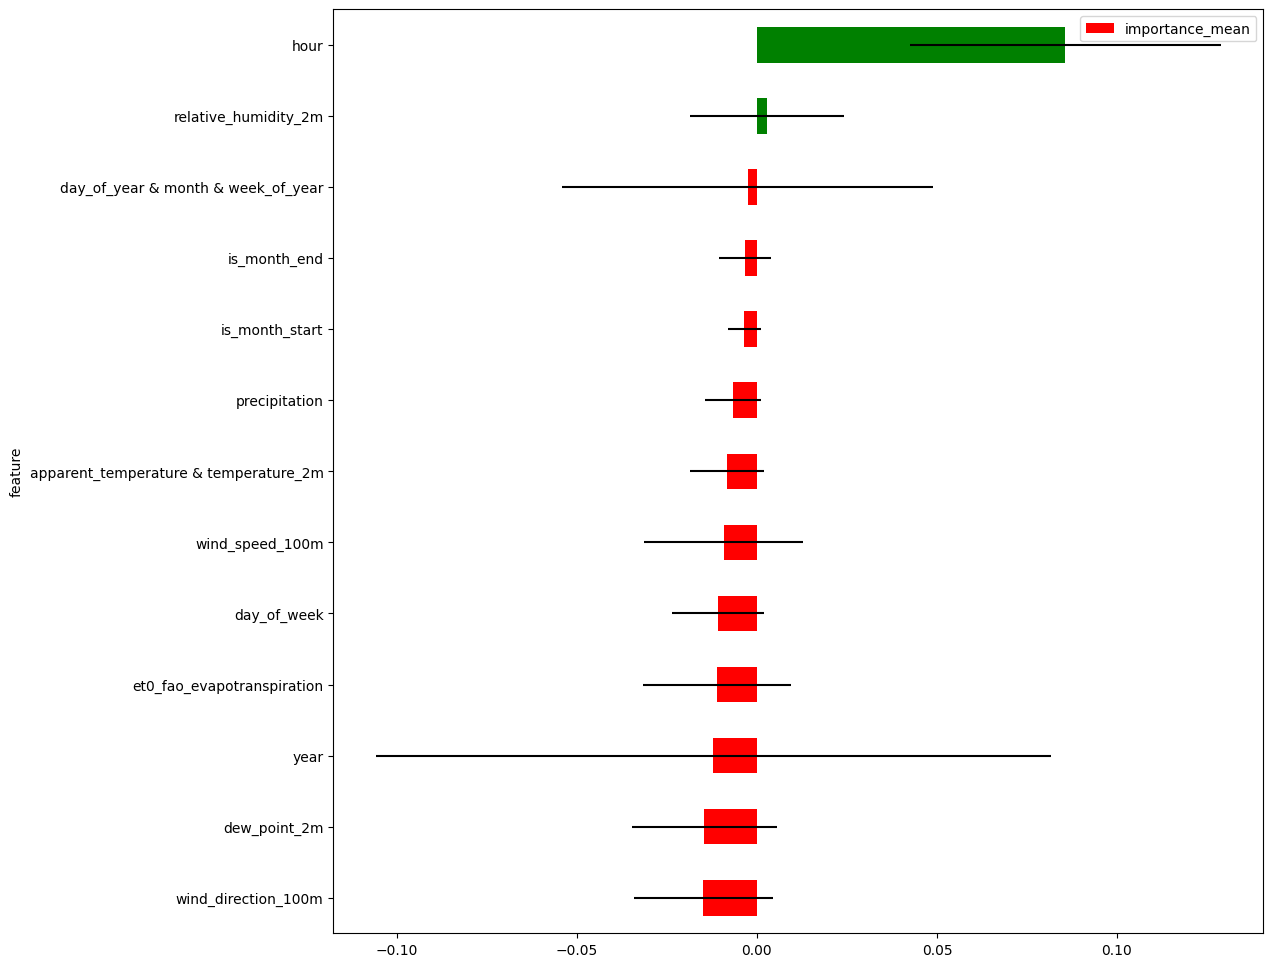

In [29]:
imp_df["feature"] = imp_df["feature"].str[:64]

lofo.plot_importance(imp_df, figsize=(12, 12))

In [ ]:
important_features = ['hour', 'relative_humidity_2m']

## TabNet (Neural Network)

Now that we've engineered few features and found the importance of all of them, let's try to train a model.

Here, we will train a Neural Network called [TabNet: Attentive Interpretable Tabular Learning](https://arxiv.org/pdf/1908.07442.pdf)

In [ ]:
%pip install pytorch-tabnet scikit-learn

In [32]:
import torch
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import LabelEncoder


tabnet = TabNetClassifier(optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-3),
    scheduler_params={"step_size":10, # how to use learning rate scheduler
    "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    n_d=4,
    n_a=4)

/Users/admin/ashish/env/sjs/lib/python3.12/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


In [33]:
def train_and_evaluate(model, X, Y, model_name):
    roc_auc_scores = []
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

        if model_name == "TabNet":
            model.fit(X_train.values, Y_train.values, max_epochs=20)
        else:
            model.fit(X_train, Y_train)

        if model_name == "TabNet":
            preds = model.predict(X_test.values)
        else:
            preds = model.predict_proba(X_test)[:, 1]

        score = roc_auc_score(Y_test, preds)
        roc_auc_scores.append(score)
        print(f"{model_name} - ROC AUC Score: {score:.5f}")

    avg_roc_auc = np.mean(roc_auc_scores)
    print(f"\nAverage ROC AUC for {model_name}: {avg_roc_auc:.5f}")
    return model, avg_roc_auc

In [38]:
data.columns

Index(['temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'apparent_temperature', 'precipitation', 'et0_fao_evapotranspiration',
       'wind_speed_100m', 'wind_direction_100m', 'date_time', 'target', 'year',
       'month', 'day_of_year', 'hour', 'day_of_week', 'week_of_year',
       'is_month_start', 'is_month_end'],
      dtype='object')

We've extracted time based features from `date_time` column, hence we'll drop it from the input features.

In [39]:
X = data.drop(columns=['target', 'date_time'])
Y = data['target']

In [40]:
model_tabnet, avg_roc_auc_tabnet = train_and_evaluate(tabnet, X, Y, "TabNet")

/Users/admin/ashish/env/sjs/lib/python3.12/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.25342 |  0:00:01s
epoch 1  | loss: 0.16611 |  0:00:03s
